# Color plots

In Python, a color plot is a plot of colored boxes (you can think of them as pixels).  To create a color plot, we use the `plt.imshow()` function.  The input of this function is an array of numbers, and the output is an array of color boxes.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [47]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

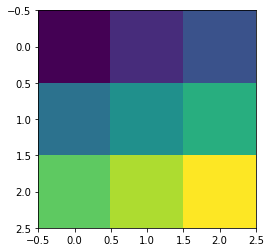

In [48]:
plt.imshow(A)

The array `A` is $3\times 3$, and the color plot is also $ 3 \times 3 $.

In [49]:
np.shape(A)

(3, 3)

A color plot is produced by equating each number between 0 and 1 with a color, and plotting the colors corresponding to the numbers in the array.  If the numbers in the array are outside the range $ [0,1] $, the `imshow()` function will automatically scale them so that they are between 0 and 1.  It does this by $$ A = (A - \min(A))/\max(A - \min(A)). $$

In [50]:
A = (A - np.min(A))/np.max(A-np.min(A))

In [51]:
A

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

### Color maps
A color map is an assignment of various colors to the numbers between 0 and 1.  The default color map is 'viridis'.  You can change the color maps used by `imshow()` using the optional input `cmap='color map'`.  Here are some examples.

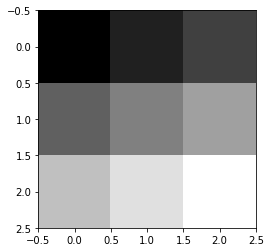

In [52]:
plt.imshow(A,cmap='gray')

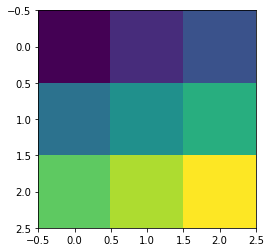

In [53]:
plt.imshow(A,cmap='viridis')

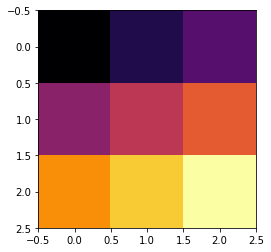

In [54]:
plt.imshow(A,cmap='inferno')

You can find a list of color maps [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).

### Interpolation
Another optional input for the function `imshow()` is `interpolation='key word'`.  This will interpolate between the color blocks in the color plot.  The effect is a blending of the colors so the borders between color blocks are not as rigid.

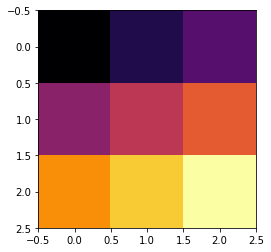

In [55]:
plt.imshow(A,cmap='inferno',interpolation='nearest')

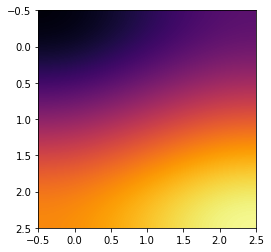

In [56]:
plt.imshow(A,cmap='inferno',interpolation='bicubic')

If you really want there to be no border between color blocks, use `interpolation='bicubic'`.

### Saving color plots
You can save a color plot using the function `imsave()`.  In this function, you need to specify the name of the file and the array.  You can also specify the desired color map, but you cannot use any interpolation.

In [57]:
X = np.random.random((250,250))

In [58]:
plt.imsave('example-interno.png',X,cmap='inferno')

## RGB color plots

In most applications on your computer, images are not defined using color maps as above, but using the RGB color scheme.  In this scheme, every color is stored as a triple $ (r,g,b) $ where the components $ r $, $ g $, and $ b $ are numbers representing the intensity of red, green, and blue respectively.

In Python, the intensity of each color is given by a number between 0 and 1.
* Red is (1,0,0)
* Green is (0,1,0)
* Blue is (0,0,1)
* Black is (0,0,0)
* White is (1,1,1)

In many other applications the intensity of each color is given by an integer between 0 and 255.
* Red is (255,0,0)
* Green is (0,255,0)
* Blue is (0,0,255)
* Black is (0,0,0)
* White is (255,255,255)

### Multidimensional arrays in numpy

To work with RGB colors effectively in Python, we will need to work with multidimensional arrays using numpy.

A 2-dimensional array in numpy consists of rows and columns.  The following array has 3 rows and 5 columns.  We can access each entry of the array by specifying which row it is in and which column it is in.

In [59]:
_2Darray = np.random.random((3,5))
print(_2Darray)

[[0.73826399 0.63987929 0.99237486 0.65347492 0.6638176 ]
 [0.99009643 0.72113162 0.63531531 0.56585963 0.43124156]
 [0.67101044 0.30553452 0.01941298 0.31229833 0.2696418 ]]


In [60]:
_2Darray[(2,3)]

0.3122983320960544

A 3-dimensional array consists of rows, columns, and sheets.  The following is a $ 2 \times 3 \times 5 $ array; it has 2 sheets, and each sheet has 3 rows and 5 columns.  We can access each entry by specifying which sheet it is in, and which row and which column in that sheet.

In [61]:
_3Darray = np.random.random((2,3,5))
print(_3Darray)

[[[0.73451156 0.57849327 0.44738065 0.30816006 0.62004668]
  [0.35415066 0.58621346 0.02779613 0.73783568 0.32374456]
  [0.86523221 0.7816634  0.16786808 0.94639004 0.64249918]]

 [[0.96899313 0.7458259  0.02338397 0.26477509 0.78181423]
  [0.57716725 0.59845088 0.18736885 0.22396488 0.12176622]
  [0.37314359 0.76746992 0.56371765 0.10320171 0.0816433 ]]]


In [62]:
_3Darray[(1,2,3)]

0.10320171432832248

### Using multidimensional arrays for RGB colors

One method for creating a color plot of RGB colors using multidimensional arrays is to create separate arrays for each color.

In [63]:
R = np.zeros((7,7))  # for red
G = np.zeros((7,7))  # for green
B = np.zeros((7,7))  # for blue

And then specify the intensities of each entry.

In [64]:
R[1:4,2:5] = np.ones((3,3))
G[3:6,1:4] = np.ones((3,3))
B[3:6,3:6] = np.ones((3,3))

Once each array has been built for red, green, and blue, they can be stacked to create an array for the image.

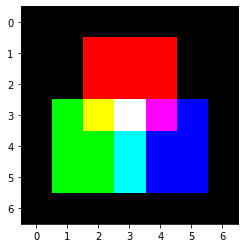

In [65]:
RGB = np.zeros((7,7,3))
RGB[:,:,0] = R
RGB[:,:,1] = G
RGB[:,:,2] = B
plt.imshow(RGB)
plt.show()

You can also create the color arrays for red, green, and blue separately, and then add them together to produce the final product.

In [66]:
R = np.zeros((7,7,3))  # for red
G = np.zeros((7,7,3))  # for green
B = np.zeros((7,7,3))  # for blue

In [67]:
R[1:4,2:5,0] = np.ones((3,3))  # last component 0 is for red
G[3:6,1:4,1] = np.ones((3,3))  # last component 1 is for green
B[3:6,3:6,2] = np.ones((3,3))  # last component 2 is for blue

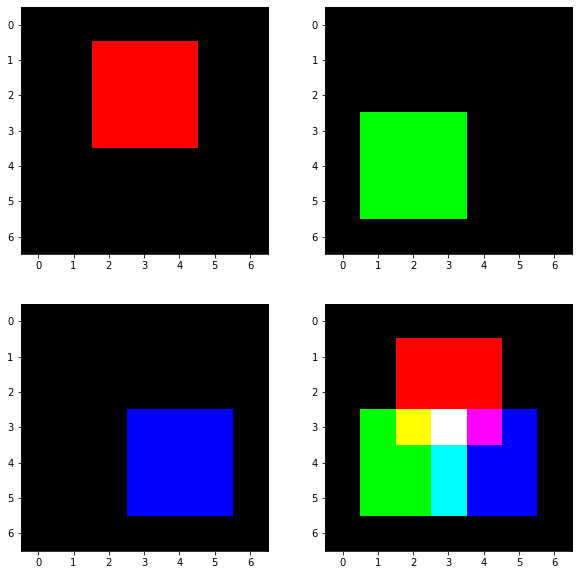

In [68]:
plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.imshow(R)
plt.subplot(2,2,2)
plt.imshow(G)
plt.subplot(2,2,3)
plt.imshow(B)
plt.subplot(2,2,4)
plt.imshow(R+G+B)
plt.show()

Here are some randomly generate color plots using RGB colors.

In [69]:
Y = np.zeros((10,10,3))

In [70]:
Y[:,:,0] = np.random.random((10,10))
Y[:,:,1] = np.random.random((10,10))
Y[:,:,2] = np.random.random((10,10))

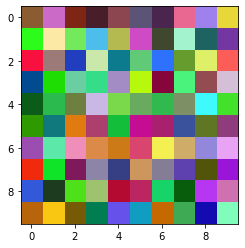

In [71]:
plt.imshow(Y)
plt.show()

In [72]:
Z = np.random.random((10,10,3))
Zred = np.zeros((10,10,3))
Zred[:,:,0] = Z[:,:,0]
Zgreen = np.zeros((10,10,3))
Zgreen[:,:,1] = Z[:,:,1]
Zblue = np.zeros((10,10,3))
Zblue[:,:,2] = Z[:,:,2]

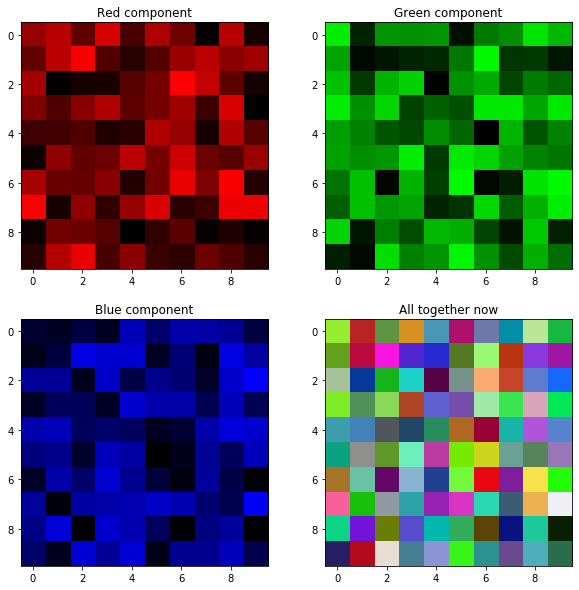

In [73]:
plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
plt.imshow(Zred)
plt.title('Red component')
plt.subplot(2,2,2)
plt.imshow(Zgreen)
plt.title('Green component')
plt.subplot(2,2,3)
plt.imshow(Zblue)
plt.title('Blue component')
plt.subplot(2,2,4)
plt.imshow(Z)
plt.title('All together now')
plt.show()

## Tartans

What are we starting with?
* pattern (string of numbers and letters)
* color definitions (dictionary of colors)
* size of desired tartan $ n $

What are we producing?
* tartan of size $ n \times n $

What is the plan?
1. generate an $ n \times n \times 3 $ array of zeros
2. read and deconstruct the pattern string
3. convert colors to have intensities between 0 and 1
4. create the vertical stripes
5. put the vertical stripes together using the template from 1.
6. generate tartan using vertical and horizontal stripes

Here are two global variables that will be included as inputs for bonus points.

In [74]:
pattern = 'K12 B32 K6 OG6'

In [75]:
color_dictionary = {'K':np.array([16,16,16])/255,'B':np.array([52,80,100])/255,'OG':np.array([92,100,40])/255}

The second is an example of a **dictionary**.

Like a list, a dictionary is a way of storing information, but unlike a list, a dictionary does not organize the data by assigning each datum to a nonnegative integer (0,1,2,3,...).  Instead, a dictionary organizes the data by way of *keys* and their corresponding *values*.  The keys take the place of the nonnegative integers used in lists for organizing the data.

In [76]:
food_list = ['apple','pizza','bagel','Skittles','cheese','kale']  # Here is a list of food.
food_dict = {'fruit':'apple','Naples':'pizza','breakfast':"bagel",'favorite':'Skittles','dairy':'cheese','cruciferous':'kale'}
                                                                  # Here is a dictionary containing the same data

To access the contents of a list, we use the index

In [77]:
food_list[3]

'Skittles'

and to access the contents of a dictionary, we use the key

In [78]:
food_dict['favorite']

'Skittles'

Lists and tuples are order by index, but dictionary are not ordered because they keys could be anything.  Here are some dictionary methods that can be very useful.

In [79]:
food_dict.keys()

dict_keys(['fruit', 'Naples', 'breakfast', 'favorite', 'dairy', 'cruciferous'])

In [80]:
food_dict.values()

dict_values(['apple', 'pizza', 'bagel', 'Skittles', 'cheese', 'kale'])

### Project bonus points

In order to obtain the bonus points for this project, you should write your functions to take as input the desired size $ n $, the dictionary of color definitions, and the pattern string.  This will require you to write a function that takes the pattern string and transforms it into a more usable format.  A good place to start is the `split()` method of strings.

In [81]:
string_list = pattern.split()  # This method splits the string up into smaller strings based on where the spaces are.
print(string_list)

['K12', 'B32', 'K6', 'OG6']


What remains for you to do, is to take each of the strings in this list and somehow separate the letters from the numbers.  Keep in mind, strings are iterable, so you can step through the characters of a string just the same as a list.

In [82]:
for character in string_list[0]:
    print(character)

K
1
2


### Some helpful functions

Two functions that you might find useful are `np.concatenate` and `np.transpose`.  Lets begin with `np.concatenate`.

In [83]:
help(np.concatenate)

Help on function concatenate in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equal or
   

This function will take a list of arrays as input, and join them together, *in order*, along a desired axis.  The default axis is `axis=0` which will stack the arrays on top of one another, this is concatenating the columns (stacking column on top of column).  If you want to join the arrays horizontally, concatenating the rows, you would use `axis=1`.

In [84]:
A = np.zeros((4,3,2))

In [85]:
B = np.zeros((4,10,2))

In [86]:
C = np.concatenate((A,B),axis=1)

You can check to make sure you concatenated in the right dimension by use the function `np.shape`.

In [87]:
np.shape(C)

(4, 13, 2)

In [88]:
help(np.transpose)

Help on function transpose in module numpy:

transpose(a, axes=None)
    Permute the dimensions of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axes : list of ints, optional
        By default, reverse the dimensions, otherwise permute the axes
        according to the values given.
    
    Returns
    -------
    p : ndarray
        `a` with its axes permuted.  A view is returned whenever
        possible.
    
    See Also
    --------
    moveaxis
    argsort
    
    Notes
    -----
    Use `transpose(a, argsort(axes))` to invert the transposition of tensors
    when using the `axes` keyword argument.
    
    Transposing a 1-D array returns an unchanged view of the original array.
    
    Examples
    --------
    >>> x = np.arange(4).reshape((2,2))
    >>> x
    array([[0, 1],
           [2, 3]])
    
    >>> np.transpose(x)
    array([[0, 2],
           [1, 3]])
    
    >>> x = np.ones((1, 2, 3))
    >>> np.transpose(x, (1, 0, 2)).s

The transpose function gives you a way of taking an array and flipping it along an axis to produce another array.  It is best to understand using examples.

In [89]:
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [90]:
B = np.transpose(A)
print(B)

[[1 4]
 [2 5]
 [3 6]]


In [91]:
X = np.zeros((2,3,4))
np.shape(X)

(2, 3, 4)

In [92]:
Y = np.transpose(X,(1,0,2))   # This will help you obtain the horizontal strip pattern from the vertical.
np.shape(Y)

(3, 2, 4)

In [93]:
Z = np.transpose(X,(2,0,1))
np.shape(Z)

(4, 2, 3)